<a href="https://colab.research.google.com/github/eucaiomiranda/eucaiomiranda/blob/main/Predicao_corridas_Uber_e_Lyft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predição de corridas Uber e Lyft**

## Introdução

As plataformas de transporte privado urbano, como Uber, 99, Lyft se tornaram muito populares em todo mundo por facilitar a locomoção seja num contexto de trabalho, lazer ou viagens, e principalmente, por oferecer condições mais acessíveis seja financeiramente quanto pela praticidade de solicitar a viagem por aplicativo.

Neste trabalhos iremos analisar o conjunto de dados de tarifas do Uber e Lyft onde o propósito é modelar como o preço ou a tarifa varia com as carcterísticas fornecidas como: distancia, condições meteorológicas, tipo de viagem, etc.

A base de dados pode ser acessada em: https://www.kaggle.com/danielbeltsazar/uber-lyft-price-prediction

## Base de Dados

A base de dados utilizada, contém informações de corridas na região de Boston, MA e apresenta dados

Temporais: data, hora
Meteorológiocos: Temperatura, temperatura aparente, previsão de chuva, ...
Geográficos: latitude, longitude, origem e destino
Outros: tipo de corrida

## Bibliotecas utilizadas

Pandas, Numpy para tratar dos dados
Seaborn para gráficos
scikitlearn pra analise de


# 1. Importando as bibliotecas e dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv("rideshare_kaggle.csv")

In [ ]:
df.shape

(637975, 57)

# 2. Análise Exploratória dos Dados

In [ ]:
df = df.dropna()
df = df.drop_duplicates()
df.shape

(637975, 57)

In [ ]:
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show()




Temporal:

In [ ]:
plot_bar('month')
plot_bar('day')
plot_bar('hour')

   month  counts
0     11  263771
1     12  374205


    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


Podemos observar que a base de dados contém apenas os meses de novembro e dezembro. Existem lacunas entre os dias 5 a 8 e 19 a 25. Já quanto as horas temos dados em todos os horários

In [ ]:
plot_bar('source')
plot_bar('destination')

                     source  counts
0                  Back Bay   53201
1               Beacon Hill   52841
2         Boston University   53172
3                    Fenway   53166
4        Financial District   54197
5          Haymarket Square   53147
6                 North End   53171
7             North Station   52576
8   Northeastern University   53164
9             South Station   53160
10         Theatre District   53201
11                 West End   52980


                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52840
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53189
11                 West End   52992


Quanto a origem e destino, tem-se uma regularidade de dados para todos os locais, entre 35k e 40k dados.

In [ ]:
plot_bar('cab_type')


  cab_type  counts
0     Lyft  307408
1     Uber  330568


In [ ]:
df2 =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="day", y="counts", color="cab_type", barmode="group")
fig2.show()

In [ ]:
df3 =df.groupby(["hour","cab_type"]).size().reset_index(name="counts")
fig3 = px.bar(data_frame=df3, x="hour", y="counts", color="cab_type", barmode="group")
fig3.show()

Quanto a plataforma, observa-se uma preferencia pelo Uber em relação ao Lyft.

# Analise de Preço

In [ ]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

Vamos analisar possíveis outliers, começando pelo valor máximo encontrado

In [ ]:
print('Maximo preço no dataset :',df.price.max())
df[df['price']==df.price.max()]

Maximo preço no dataset : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


In [ ]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Fenway')& (df_group['destination']=='Financial District')]

,source,destination,mean
20,Fenway,Financial District,23.438818


In [ ]:

df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Boston University')& (df_group['destination']=='Financial District')]

,source,destination,mean
14,Boston University,Financial District,24.146085


In [ ]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Boston University')& (df_group['destination']=='Financial District')]

,source,destination,mean
14,Boston University,Financial District,24.146085


Podemos observar que o valor da corrida não faz sentido considerando a distância entre a origem e o destino e a média desse trajeto, podemos considerar então um caso de outlier.

Para melhorar a analise iremos implementar um codigo que elimina as instâncias onde o preço é igual ao preço máximo no DataFrame. Isso pode ser uma abordagem para lidar com valores atípicos ou dados que podem distorcer a análise estatística ou modelos de machine learning.

In [ ]:
df = df.loc[df['price']!=df.price.max()]

# Análise de correlação

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637975 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637975 non-null  object 
 1   timestamp                    637975 non-null  float64
 2   hour                         637975 non-null  int64  
 3   day                          637975 non-null  int64  
 4   month                        637975 non-null  int64  
 5   datetime                     637975 non-null  object 
 6   timezone                     637975 non-null  object 
 7   source                       637975 non-null  object 
 8   destination                  637975 non-null  object 
 9   cab_type                     637975 non-null  object 
 10  product_id                   637975 non-null  object 
 11  name                         637975 non-null  object 
 12  price                        637975 non-null  float64
 13 

In [ ]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

Nosso objetivo é fazer a regressao linear, portanto precisamos analisar a correlacao das features com nosso target que é o 'Preço'.

In [ ]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [ ]:
df_temp = new_df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<Axes: >

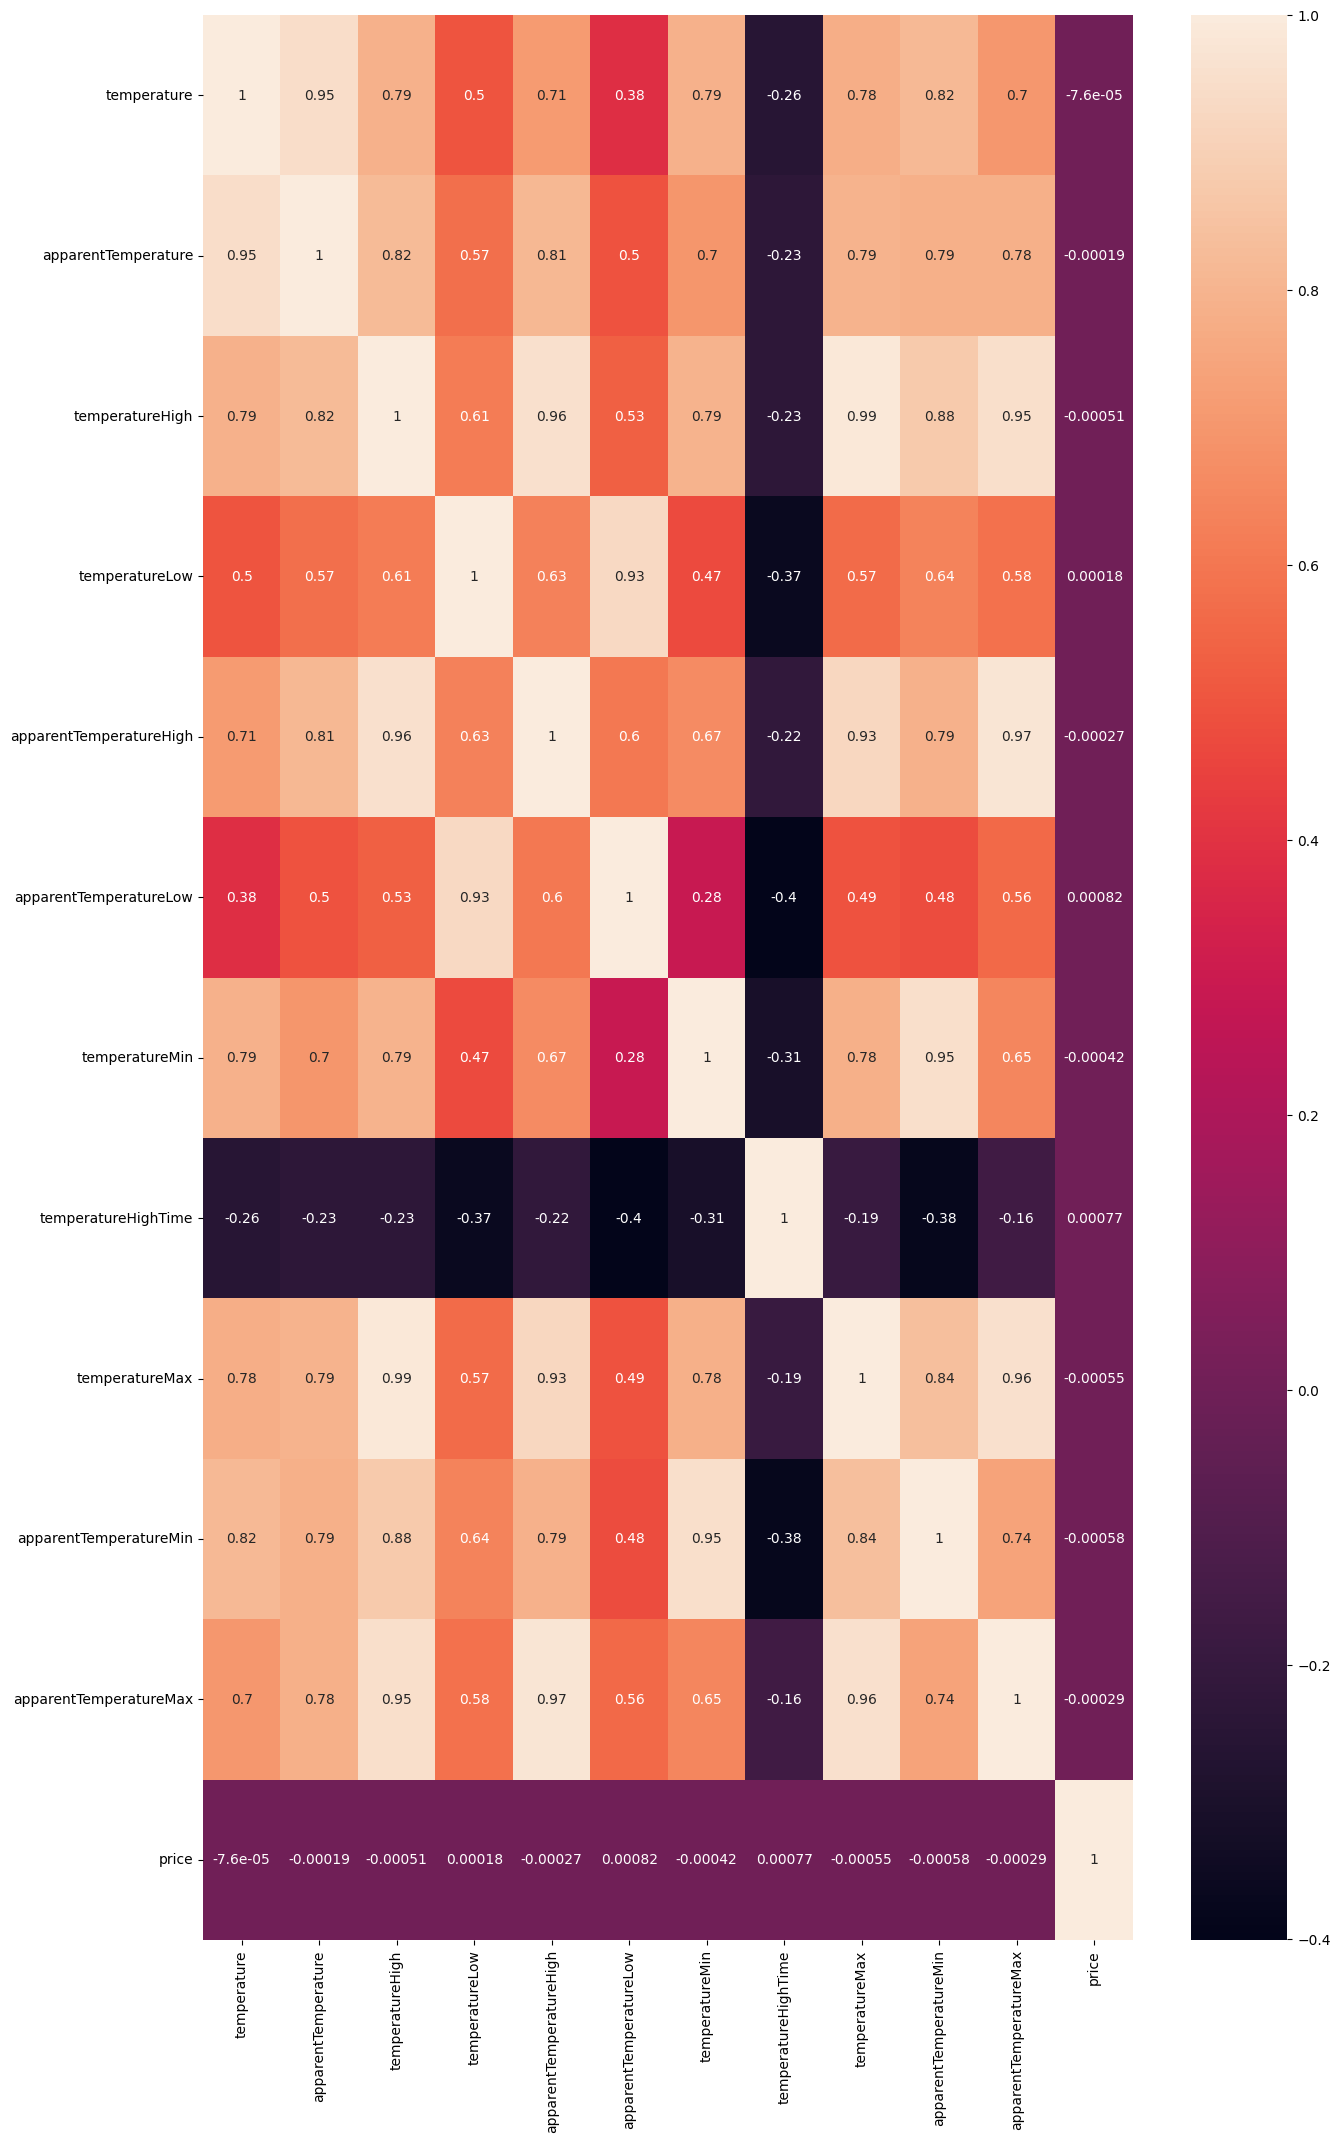

In [ ]:
plt.figure(figsize=(15,25))
sns.heatmap(df_temp.corr(),annot=True)

Podemos observar  que todas as características relacionadas à temperatura têm uma correlação fraca com nossa feature alvo, que é o preço. Remover todas elas não terá impacto significativo no nosso modelo de regressão. Em termos práticos, isso significa que essas características de temperatura não estão fornecendo informações úteis ou preditivas para o preço no contexto do modelo de regressão que está sendo construído.

In [ ]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(637975, 31)

Agora vamos analisar as caracteristicas relacionadas ao clima:

In [ ]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

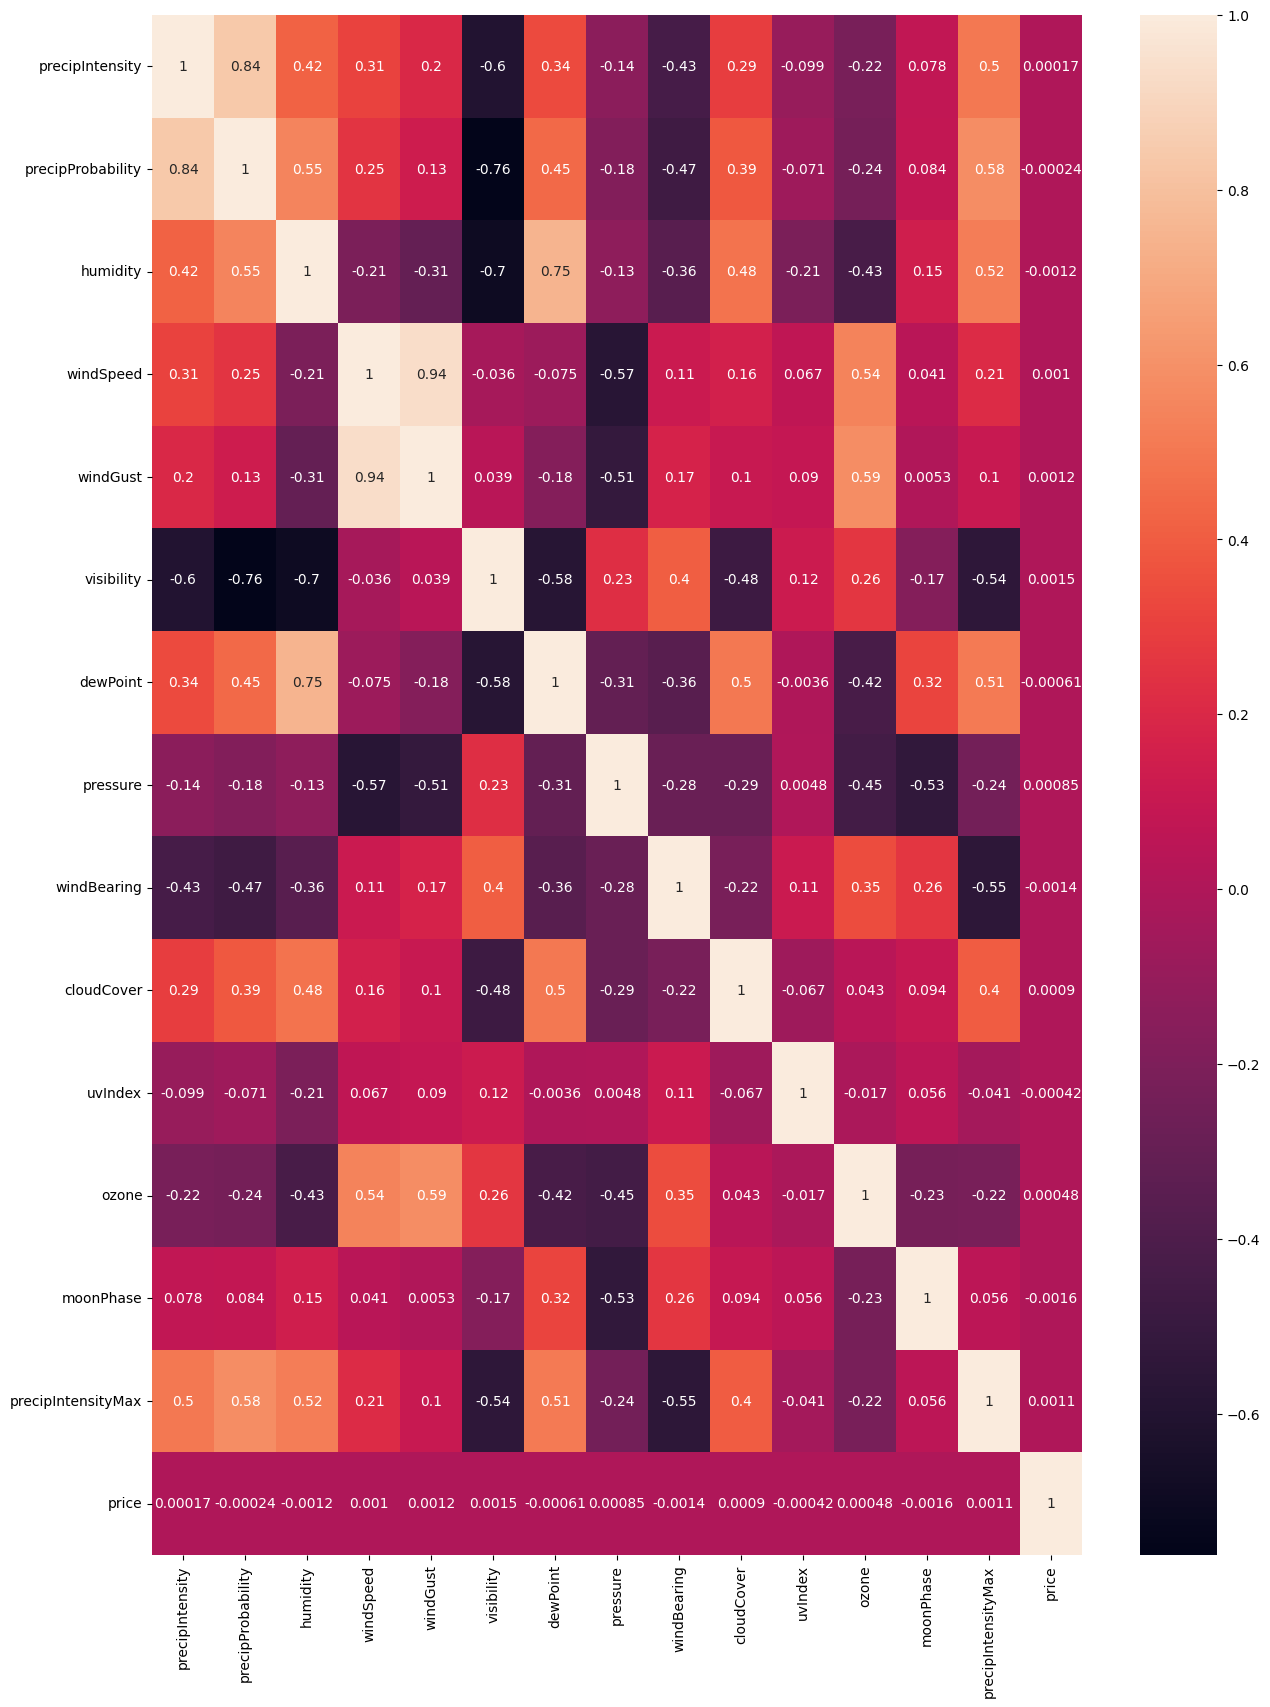

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Aparentemente, todas as características relacionadas ao clima também têm uma correlação fraca com nossa feature alvo, que é o preço. Mais uma vez, remover todas elas não terá impacto significativo no nosso modelo de regressão. Isso sugere que, no contexto do modelo de regressão em questão, essas características climáticas não estão fornecendo informações substanciais ou preditivas em relação ao preço.

In [ ]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(637975, 17)

Agora vamos analisar as features categoricas

In [ ]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

Podemos ver que a feature 'timezone' possui apenas um valor e a feature 'product_id' contém muitos valores não identificados. Portanto, podemos removê-las. A remoção dessas features pode ser benéfica para simplificar o conjunto de dados e evitar que características com pouca variabilidade ou com muitos valores não identificados afetem negativamente o desempenho do modelo.

In [ ]:
new_df = new_df.drop(['timezone','product_id'],axis=1)
new_df.shape

(637975, 15)

Agora iremos analisar a correlação das variaveis categóricas com o preço:

In [ ]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<Axes: >

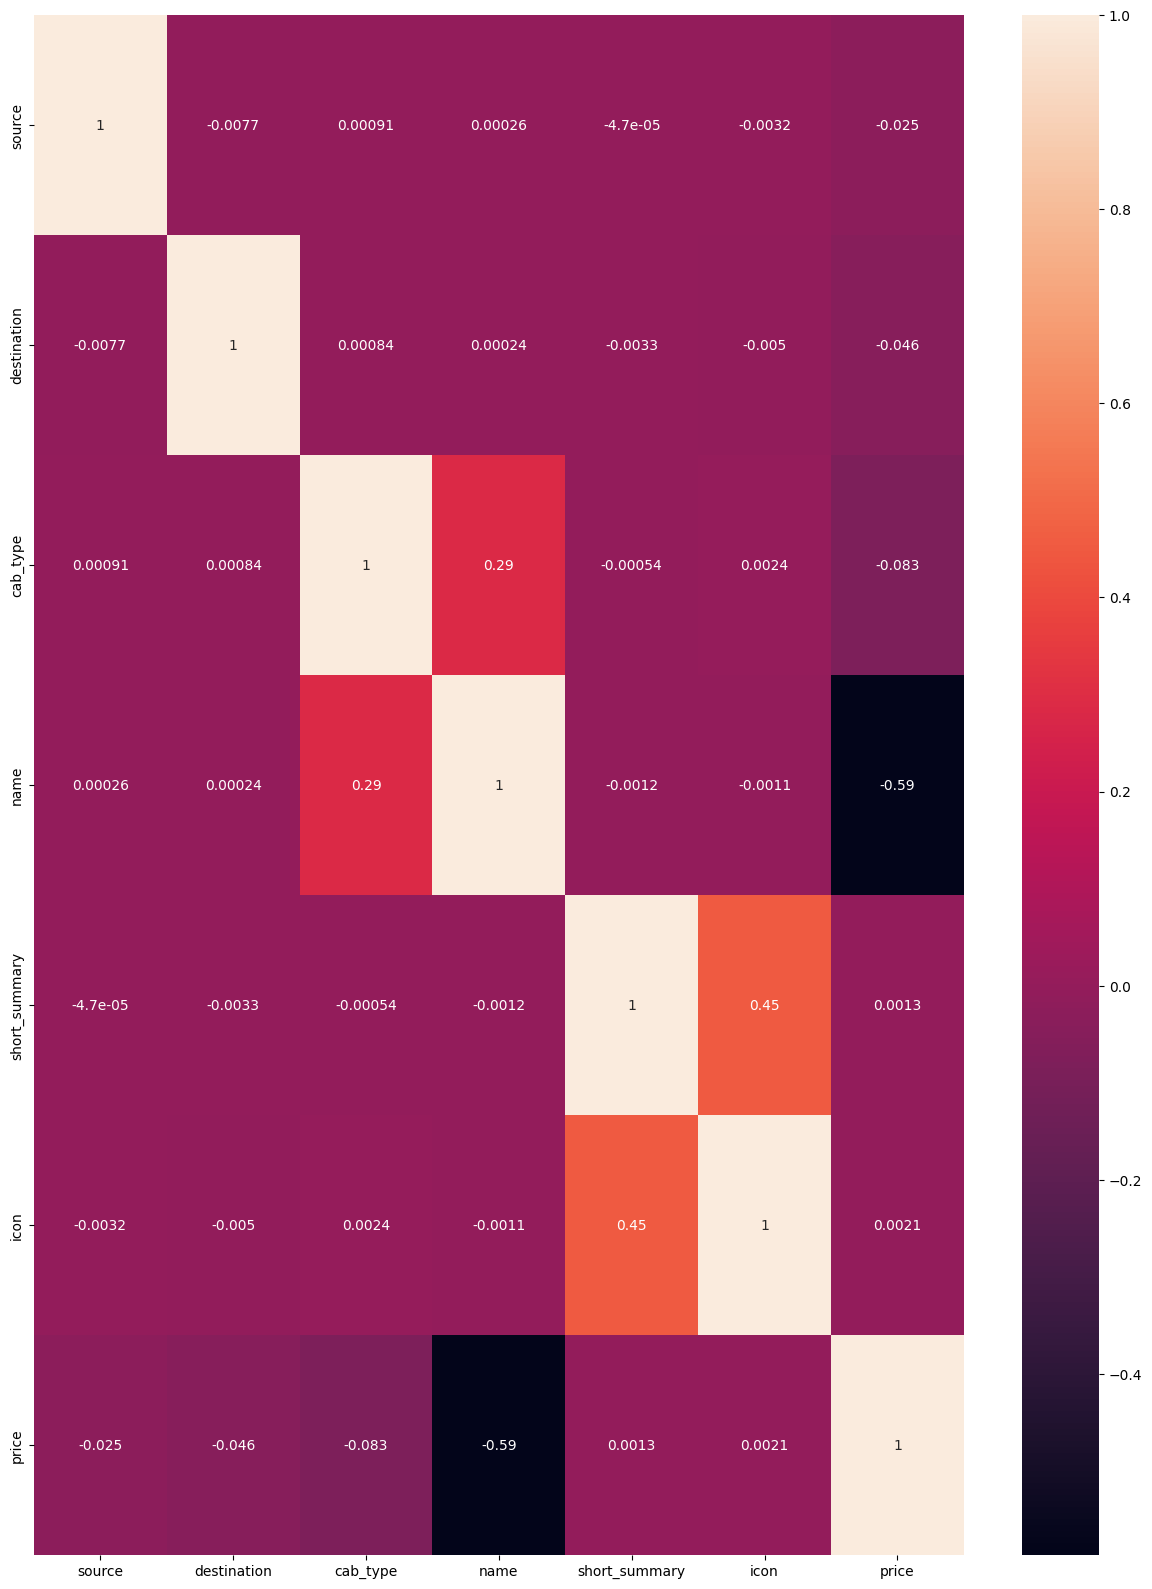

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)


Podemos observar que apenas a feature 'name' possui uma correlação relativamente forte. As features 'source', 'destination' e 'cab_type' têm uma correlação fraca, entretanto iremos escolher feature 'cab_type' porque ela tem uma correlação mais forte do que as outras duas features. As demais features serão removidas. Essa escolha de features com base em correlações pode ser uma estratégia eficaz para simplificar o conjunto de dados, mantendo aquelas que têm uma relação mais forte com a variável alvo (nesse caso, 'price').

In [ ]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude,visibility.1
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,10.000
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,4.786
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,10.000
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,10.000
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,10.000


In [ ]:
#Iremos também remover data, hora, mes, latitude e longitude pois nao serao uteis agora
new_df = new_df.drop(['hour','day','month','latitude','longitude', 'visibility.1'],axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


In [ ]:
new_df.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

# Removendo Outliers

Já fizemos isso anteriormente, mas apenas para uma instância que tinha o valor máximo de preço.

Queremos verificar outro possível valor atípico. Iremos utilizar o método IQR para verificar valores atípicos superiores e inferiores. O método IQR (Intervalo Interquartil) é uma abordagem estatística comum para identificar valores atípicos com base na distribuição dos dados. Valores que estão além de certos limites em relação ao IQR podem ser considerados atípicos. Essa é uma técnica útil para lidar com dados que podem conter outliers.








In [ ]:
Qp12 = new_df['price'].quantile(0.25)
Qp32 = new_df['price'].quantile(0.75)
IQRp = Qp32-Qp12

Este código está calculando o Intervalo Interquartil (IQR) para a coluna 'price' em um DataFrame chamado new_df. Vamos explicar cada parte do código:

Qp12 = new_df['price'].quantile(0.25):

new_df['price']: Seleciona a coluna 'price' no DataFrame new_df.
.quantile(0.25): Calcula o primeiro quartil (25º percentil) da distribuição dos valores na coluna 'price'. O resultado é armazenado na variável Qp12.
Qp32 = new_df['price'].quantile(0.75):

new_df['price']: Seleciona a coluna 'price' no DataFrame new_df.
.quantile(0.75): Calcula o terceiro quartil (75º percentil) da distribuição dos valores na coluna 'price'. O resultado é armazenado na variável Qp32.
IQRp = Qp32 - Qp12:

Calcula o Intervalo Interquartil (IQR) subtraindo o primeiro quartil do terceiro quartil. O IQR é uma medida da dispersão estatística e é usado para identificar valores atípicos. O resultado é armazenado na variável IQRp.
Em resumo, essas linhas de código calculam estatísticas importantes (primeiro quartil, terceiro quartil e IQR) relacionadas à distribuição da coluna 'price' no DataFrame new_df. Essas estatísticas podem ser usadas para identificar possíveis valores atípicos com base no método do IQR.

In [ ]:
new_df[new_df['price']>(Qp32+(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier
706,Lyft,Lux Black,52.5,3.25,2.00
707,Lyft,Lux Black XL,67.5,3.25,2.00
769,Lyft,Lux Black XL,45.5,4.76,1.00
1094,Lyft,Lux Black XL,45.5,4.31,1.00
1318,Lyft,Lux Black XL,45.5,5.33,1.00
...,...,...,...,...,...
692439,Uber,Black SUV,47.0,5.56,1.00
692698,Lyft,Lux Black XL,52.5,4.58,1.25
692891,Lyft,Lux Black XL,47.5,5.42,1.00
692962,Uber,Black SUV,51.0,7.36,1.00


Podemos ver que temos 5588 valores atípicos nos dados. Podemos removê-los ou descartá-los. A remoção de valores atípicos pode ser uma abordagem válida, especialmente se esses valores atípicos não são representativos do comportamento geral dos dados ou se podem afetar negativamente o desempenho do modelo.

In [ ]:
print('Size before removing :',new_df.shape)
new_df= new_df[~((new_df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',new_df.shape)

Size before removing : (637975, 5)
Size after removing : (632387, 5)


# Modelo de Regressão

 Com a análise exploratória de dados bem feita, podemos começar a testar um modelo

# One-Hot Encoding

O "One-Hot Encoding" (Codificação One-Hot) é uma técnica utilizada para representar variáveis categóricas (ou de texto) como vetores binários. Isso é necessário porque muitos modelos de machine learning não podem trabalhar diretamente com variáveis categóricas em sua forma de texto. O processo de "One-Hot Encoding" transforma cada valor categórico em uma coluna e atribui um valor binário (1 ou 0) a essa coluna, indicando a presença ou ausência do valor original.

In [ ]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])

    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)

    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)

    if keep_first == False:
        new_data=new_data.iloc[:,1:]

    return new_data

In [ ]:
new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)

new_df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


# Dataset split

Iremos agora dividir o data set em subconjuntos distintos para treinamento e teste. A ideia por trás disso é usar uma parte do conjunto de dados para treinar um modelo de machine learning e, em seguida, avaliar o desempenho desse modelo em outra parte do conjunto de dados que o modelo ainda não viu.

In [ ]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X: Representa as features (atributos) do conjunto de dados, excluindo a coluna alvo 'price'.

Y: Representa a variável alvo 'price'.

X_train e y_train: Representam as features e a variável alvo do conjunto de treinamento, respectivamente.

X_test e y_test: Representam as features e a variável alvo do conjunto de teste, respectivamente.

train_test_split(X, y, test_size=0.3, random_state=0): Realiza a divisão do conjunto de dados.

X e y: Os dados a serem divididos.

test_size=0.3: Especifica que 30% dos dados serão usados para formar o conjunto de teste, enquanto 70% serão usados para o conjunto de treinamento.

random_state=0: Fornecendo um valor fixo para random_state garante que a divisão seja reproduzível, ou seja, a mesma divisão ocorrerá sempre que o código for executado novamente. Isso é útil para resultados consistentes, especialmente durante o desenvolvimento e teste de modelos.

# Modelo

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#adicionar arvore de decisao


Este código utiliza a biblioteca scikit-learn (sklearn) em Python para importar a classe LinearRegression e, em seguida, cria uma instância dessa classe.

O modelo de regressão linear é uma técnica de modelagem estatística que assume uma relação linear entre as features (variáveis independentes) e a variável alvo (dependente). Quando treinado nos dados, o modelo tenta encontrar os coeficientes que melhor ajustam uma linha (ou plano, em casos de múltiplas dimensões) aos dados.

In [ ]:
model = reg.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9337789051792855

O coeficiente de determinação, ou R², é uma métrica que avalia o quão bem as previsões do modelo explicam a variação nos dados reais. Ele varia de 0 a 1, onde 1 indica que o modelo explica perfeitamente a variação nos dados, e 0 indica que o modelo não fornece nenhuma explicação. Um R² negativo indica que o modelo é pior do que um modelo simples que sempre prevê a média dos rótulos de treinamento.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

erro_perc = mean_absolute_percentage_error(y_test,y_pred)
print(erro_perc)

0.12858785398078343


Temos acima o erro percentual do modelo de regressão linear

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5.108383101703272
2.260173245948919


A função mean_squared_error calcula o erro quadrático médio (MSE) entre os valores previstos pelo modelo e os valores reais do conjunto de dados de teste ou validação. O MSE é calculado como a média das diferenças quadradas entre os valores previstos e os valores verdadeiros. Quanto menor o valor do MSE, melhor é a performance do modelo, pois indica menor dispersão dos erros.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {

            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.933465,{}
1,lasso,0.211560,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.964468,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Esse algoritimo escolhe a melhor combinação de parametros para cada método de regresão, no caso da árvore de decisão, temos o criterion, que nos indica a qualidade da divisão feita pela árvore, através do erro da predição, já o splitter decide como será a divisão, se é feita de forma aleatória ou a partir da melhora de resultado.
Usando a Decision tree como método de regressão, obtivemos um resultado melhor do que a regressão linear, já que o erro quadrático médio foi de 0,962, menor do que o 2,24 do modelo anterior.



In [ ]:
regressao_arvore = DecisionTreeRegressor(random_state=15)

regressao_arvore.fit(X_train,y_train)
resultado_arvore = regressao_arvore.predict(X_test)

erro_percentual = mean_absolute_percentage_error(y_test,resultado_arvore)
print('Erro percentual: ',erro_percentual*100,'%')

Erro percentual:  8.237062898971496 %


Comparando o modelo da árvore de decisão com o da regressão linear, vemos que a árvore de decisão tem um erro percentual menor do que a regressão linear, já que a árvore apresenta 8,23% de erro e a regressão linear apresenta 12,85%.
